In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#Load the dataset
data = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Employee Salary Prediction App\Dataset\adult.csv")

In [3]:
data = data.replace(' ?', np.nan).dropna()

In [4]:
X = data.drop("income", axis=1)
y = data["income"]

In [5]:
categorical_cols = X.select_dtypes(include="object").columns
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


C:\Users\dell\AppData\Local\Temp\ipykernel_24628\1314790381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=feature_names[indices][:10], palette='viridis')


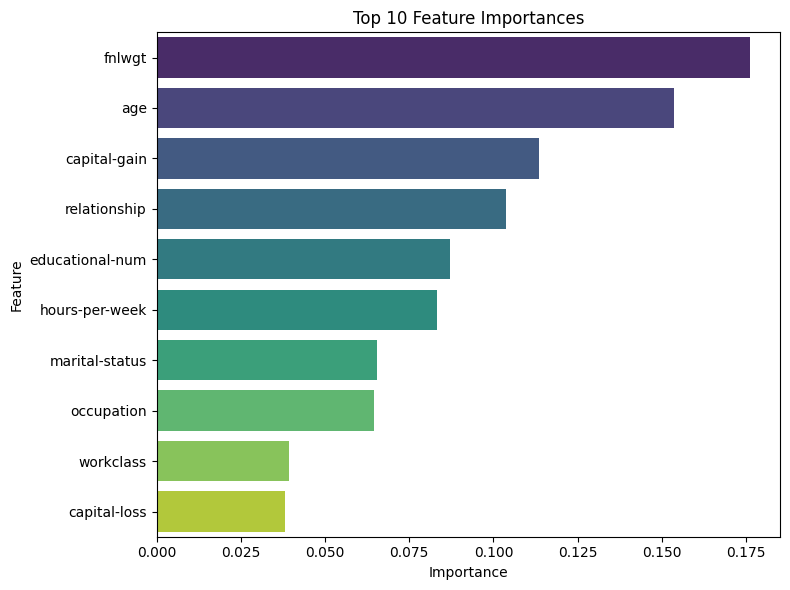

In [8]:
# Only if using tree-based models like RandomForest
feature_names = X.columns  # Make sure this matches your feature DataFrame
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices][:10], y=feature_names[indices][:10], palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [9]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8612959361244754
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7431
        >50K       0.75      0.62      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [10]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("🧩 Confusion Matrix:\n", cm)

🧩 Confusion Matrix:
 [[6954  477]
 [ 878 1460]]


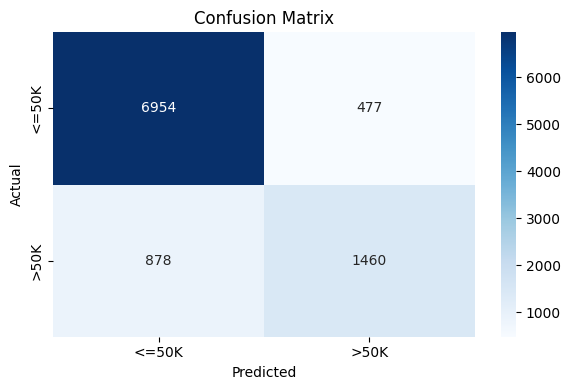

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [12]:
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [13]:
with open("ordinal_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [14]:
print("✅ Model and Encoder saved successfully!")

✅ Model and Encoder saved successfully!


In [15]:
import gzip

In [16]:
with open("rf_model.pkl", "rb") as f_in:
    model = pickle.load(f_in)

with gzip.open("rf_model_compressed.pkl.gz", "wb") as f_out:
    pickle.dump(model, f_out)